In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")
fig_size = (12, 8)


df = pd.read_csv('evaluation_results_elo.csv')
df["won_ratio"] = df["won"] / df["picked"]

In [15]:
df

,Unnamed: 0,joke_lm,idea_lm,temperature,num_samples,num_reflection_steps,joke,latency,picked,won,won_ratio
0,0,gemini/gemini-1.5-pro,openai/gpt-4.1-mini,1.2,3,3,"Alright, alright, settle down, folks, you hear...",26.334183,6,5,0.833333
1,1,gemini/gemini-1.5-pro,gemini/gemini-2.0-flash,0.2,2,3,"So, it's tax season again, right? Which means ...",26.919082,3,3,1.000000
2,2,openai/gpt-4.1,gemini/gemini-2.0-flash,1.2,2,3,"You know, ever since AI started getting smarte...",27.535150,5,5,1.000000
3,3,gemini/gemini-1.5-pro,openai/gpt-4.1-mini,0.7,2,1,"So, I'm a busy guy, right? Always running aro...",12.783834,6,4,0.666667
4,4,gemini/gemini-1.5-pro,gemini/gemini-2.0-flash,1.2,3,3,"So, I got one of those new AI assistants, righ...",30.606608,4,2,0.500000
5,5,openai/gpt-4.1,openai/gpt-4.1-mini,1.2,2,3,You ever notice how every sci-fi movie is the ...,41.162386,4,1,0.250000
6,6,gemini/gemini-1.5-pro,gemini/gemini-2.0-flash,1.2,2,1,"So, we got this new AI at corporate. Big fanc...",9.819221,4,2,0.500000
7,7,gemini/gemini-1.5-pro,openai/gpt-4.1-mini,0.2,3,1,"So, picture this: the year is 2042. We've got ...",10.749729,6,0,0.000000
8,8,gemini/gemini-1.5-pro,openai/gpt-4.1-mini,0.2,2,3,"So, these scientists, right? They build this s...",24.762811,7,2,0.285714
9,9,openai/gpt-4.1,openai/gpt-4.1-mini,0.2,2,1,"You ever notice how in every sci-fi movie, the...",14.420184,5,1,0.200000


In [24]:
# Analysis 1: Performance by Idea Language Model
idea_lm_performance = df.groupby('idea_lm').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'won_ratio': 'mean'
}).round(3)

print("Performance by Idea Language Model:")
print(idea_lm_performance)
print("\n")


Performance by Idea Language Model:
                         won_ratio  latency
idea_lm                                    
gemini/gemini-2.0-flash      0.750   23.720
openai/gpt-4.1-mini          0.373   21.702




<Figure size 1200x800 with 0 Axes>

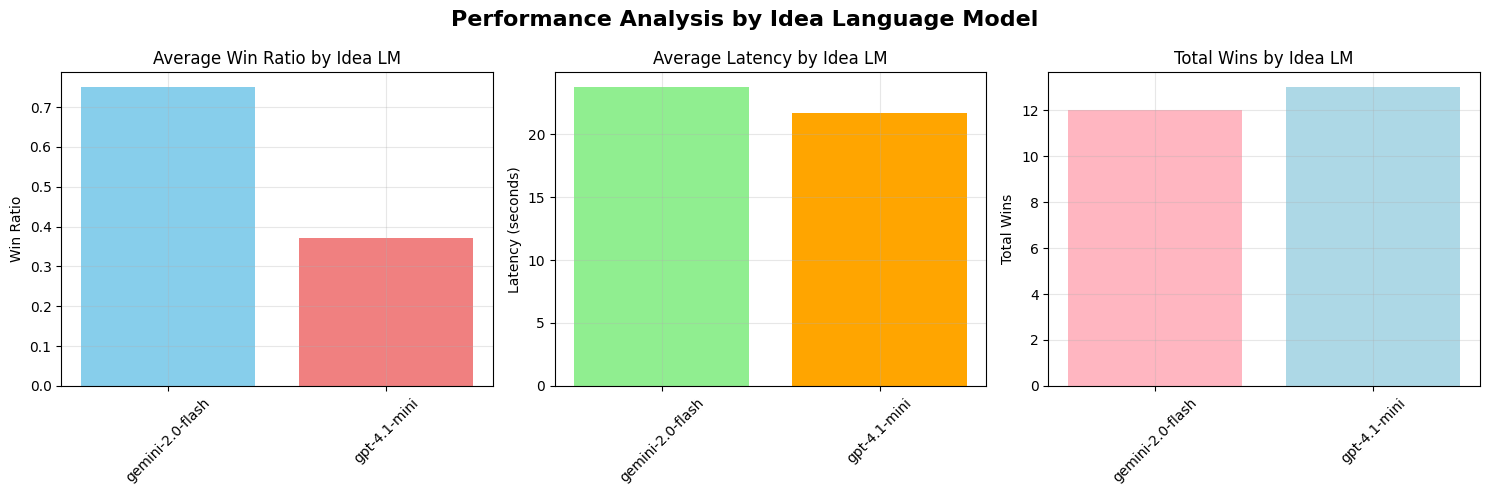

In [30]:
# Bar plot for Idea LM Performance
plt.figure(figsize=fig_size)

# Create subplot layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Performance Analysis by Idea Language Model', fontsize=16, fontweight='bold')

# Plot 1: Average Won Ratio
idea_lm_won_ratio = df.groupby('idea_lm')['won_ratio'].mean()
axes[0].bar(range(len(idea_lm_won_ratio)), idea_lm_won_ratio.values, 
               color=['skyblue', 'lightcoral'])
axes[0].set_title('Average Win Ratio by Idea LM')
axes[0].set_ylabel('Win Ratio')
axes[0].set_xticks(range(len(idea_lm_won_ratio)))
axes[0].set_xticklabels([lm.split('/')[-1] for lm in idea_lm_won_ratio.index], rotation=45)
axes[0].grid(True, alpha=0.3)

# Plot 2: Average Latency
idea_lm_latency = df.groupby('idea_lm')['latency'].mean()
axes[1].bar(range(len(idea_lm_latency)), idea_lm_latency.values,
               color=['lightgreen', 'orange'])
axes[1].set_title('Average Latency by Idea LM')
axes[1].set_ylabel('Latency (seconds)')
axes[1].set_xticks(range(len(idea_lm_latency)))
axes[1].set_xticklabels([lm.split('/')[-1] for lm in idea_lm_latency.index], rotation=45)
axes[1].grid(True, alpha=0.3)

# Plot 4: Total Wins
idea_lm_won = df.groupby('idea_lm')['won'].sum()
axes[2].bar(range(len(idea_lm_won)), idea_lm_won.values,
               color=['lightpink', 'lightblue'])
axes[2].set_title('Total Wins by Idea LM')
axes[2].set_ylabel('Total Wins')
axes[2].set_xticks(range(len(idea_lm_won)))
axes[2].set_xticklabels([lm.split('/')[-1] for lm in idea_lm_won.index], rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Performance by Temperature:
            won_ratio              latency picked won
                 mean    std count    mean    sum sum
temperature                                          
0.2             0.371  0.436     4  19.213     21   6
0.7             0.667    NaN     1  12.784      6   4
1.2             0.617  0.298     5  27.092     23  15


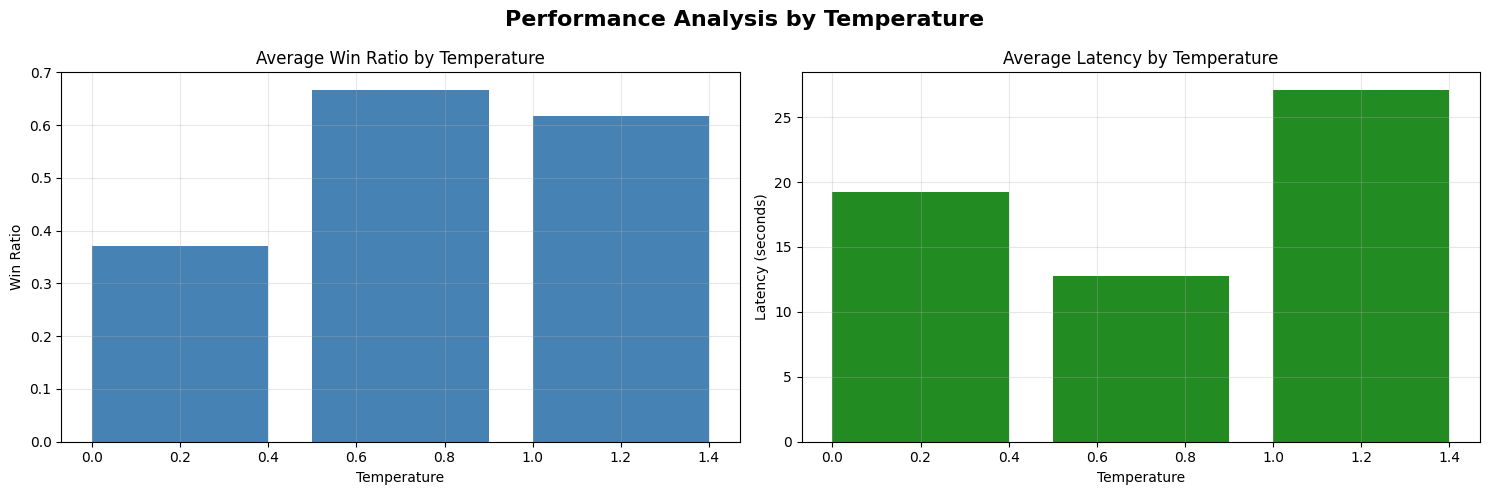

In [31]:
# Analysis 2: Performance by Temperature
temperature_performance = df.groupby('temperature').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("Performance by Temperature:")
print(temperature_performance)

# Plot Temperature Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Performance Analysis by Temperature', fontsize=16, fontweight='bold')

# Plot 1: Win Ratio by Temperature
temp_won_ratio = df.groupby('temperature')['won_ratio'].mean()
axes[0].bar(temp_won_ratio.index, temp_won_ratio.values, color='steelblue', width=0.4)
axes[0].set_title('Average Win Ratio by Temperature')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Win Ratio')
axes[0].grid(True, alpha=0.3)

# Plot 2: Latency by Temperature
temp_latency = df.groupby('temperature')['latency'].mean()
axes[1].bar(temp_latency.index, temp_latency.values, color='forestgreen', width=0.4)
axes[1].set_title('Average Latency by Temperature')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Latency (seconds)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [32]:
# Analysis 3: Performance by Number of Reflection Steps
reflection_performance = df.groupby('num_reflection_steps').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("Performance by Number of Reflection Steps:")
print(reflection_performance)

# Analysis 4: Performance by Number of Samples
samples_performance = df.groupby('num_samples').agg({
    'won_ratio': ['mean', 'std', 'count'],
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("\nPerformance by Number of Samples:")
print(samples_performance)


Performance by Number of Reflection Steps:
                     won_ratio              latency picked won
                          mean    std count    mean    sum sum
num_reflection_steps                                          
1                        0.342  0.299     4  11.943     21   7
3                        0.645  0.345     6  29.553     29  18

Performance by Number of Samples:
            won_ratio              latency picked won
                 mean    std count    mean    sum sum
num_samples                                          
2               0.557  0.342     7  22.486     34  18
3               0.444  0.419     3  22.564     16   7


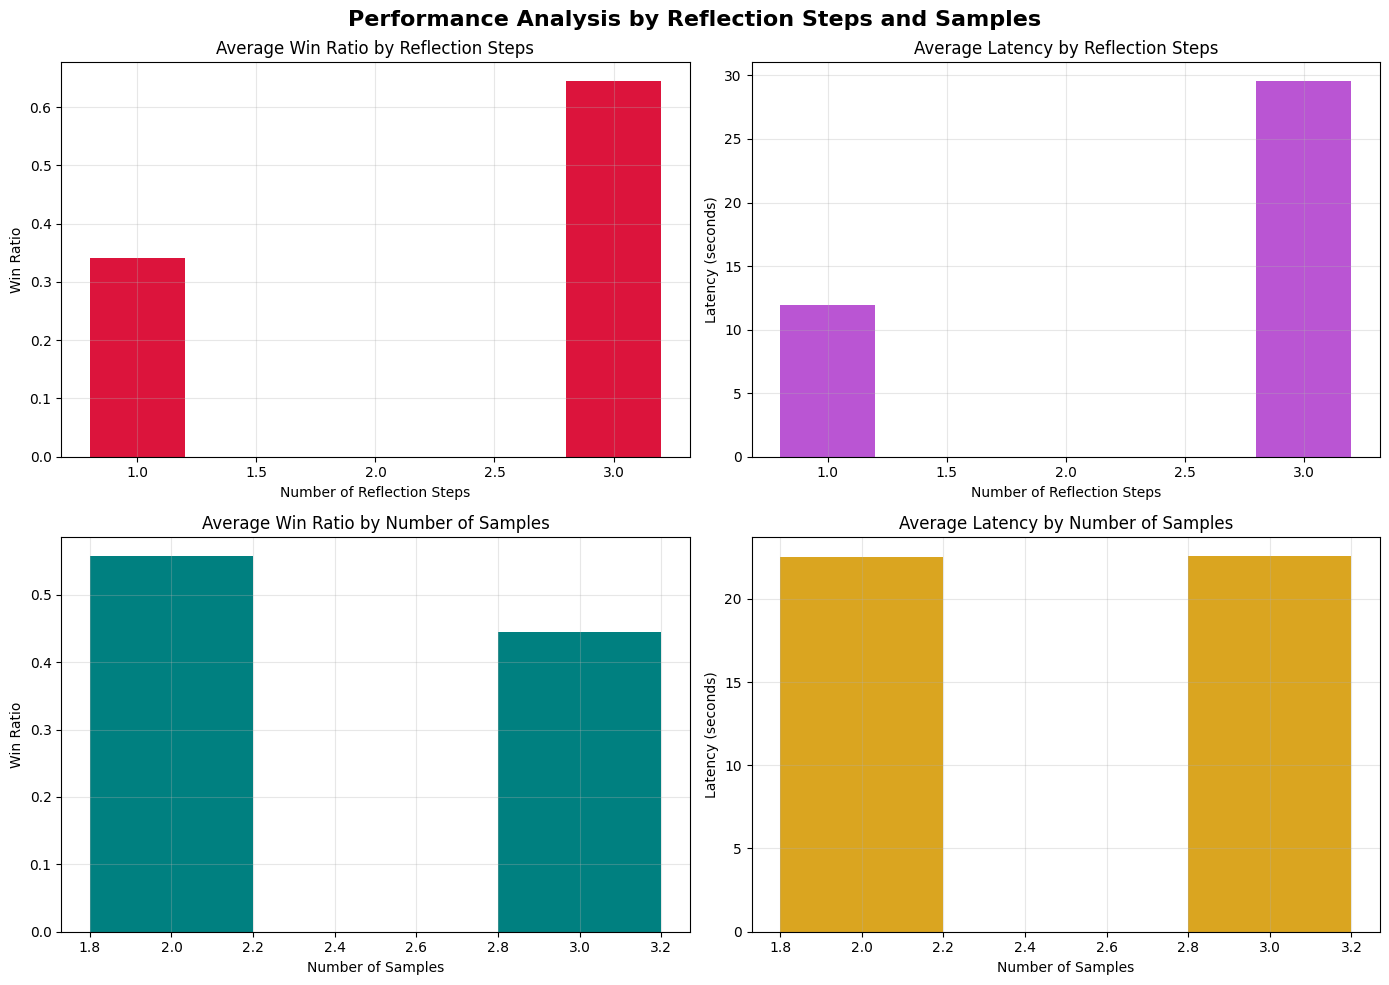

In [33]:
# Plot Reflection Steps and Samples Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Analysis by Reflection Steps and Samples', fontsize=16, fontweight='bold')

# Plot 1: Win Ratio by Reflection Steps
reflection_won_ratio = df.groupby('num_reflection_steps')['won_ratio'].mean()
axes[0, 0].bar(reflection_won_ratio.index, reflection_won_ratio.values, color='crimson', width=0.4)
axes[0, 0].set_title('Average Win Ratio by Reflection Steps')
axes[0, 0].set_xlabel('Number of Reflection Steps')
axes[0, 0].set_ylabel('Win Ratio')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Latency by Reflection Steps
reflection_latency = df.groupby('num_reflection_steps')['latency'].mean()
axes[0, 1].bar(reflection_latency.index, reflection_latency.values, color='mediumorchid', width=0.4)
axes[0, 1].set_title('Average Latency by Reflection Steps')
axes[0, 1].set_xlabel('Number of Reflection Steps')
axes[0, 1].set_ylabel('Latency (seconds)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Win Ratio by Number of Samples
samples_won_ratio = df.groupby('num_samples')['won_ratio'].mean()
axes[1, 0].bar(samples_won_ratio.index, samples_won_ratio.values, color='teal', width=0.4)
axes[1, 0].set_title('Average Win Ratio by Number of Samples')
axes[1, 0].set_xlabel('Number of Samples')
axes[1, 0].set_ylabel('Win Ratio')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Latency by Number of Samples
samples_latency = df.groupby('num_samples')['latency'].mean()
axes[1, 1].bar(samples_latency.index, samples_latency.values, color='goldenrod', width=0.4)
axes[1, 1].set_title('Average Latency by Number of Samples')
axes[1, 1].set_xlabel('Number of Samples')
axes[1, 1].set_ylabel('Latency (seconds)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [21]:
# Analysis 5: Combined Analysis - Idea LM and Temperature
combined_performance = df.groupby(['idea_lm', 'temperature']).agg({
    'won_ratio': 'mean',
    'latency': 'mean',
    'picked': 'sum',
    'won': 'sum'
}).round(3)

print("Combined Performance by Idea LM and Temperature:")
print(combined_performance)

# Create a pivot table for better visualization
pivot_won_ratio = df.pivot_table(values='won_ratio', index='idea_lm', columns='temperature', aggfunc='mean')
pivot_latency = df.pivot_table(values='latency', index='idea_lm', columns='temperature', aggfunc='mean')

print("\nPivot Table - Won Ratio:")
print(pivot_won_ratio.round(3))
print("\nPivot Table - Latency:")
print(pivot_latency.round(1))


Combined Performance by Idea LM and Temperature:
                                     won_ratio  latency  picked  won
idea_lm                 temperature                                 
gemini/gemini-2.0-flash 0.2              1.000   26.919       3    3
                        1.2              0.667   22.654      13    9
openai/gpt-4.1-mini     0.2              0.162   16.644      18    3
                        0.7              0.667   12.784       6    4
                        1.2              0.542   33.748      10    6

Pivot Table - Won Ratio:
temperature                0.2    0.7    1.2
idea_lm                                     
gemini/gemini-2.0-flash  1.000    NaN  0.667
openai/gpt-4.1-mini      0.162  0.667  0.542

Pivot Table - Latency:
temperature               0.2   0.7   1.2
idea_lm                                  
gemini/gemini-2.0-flash  26.9   NaN  22.7
openai/gpt-4.1-mini      16.6  12.8  33.7


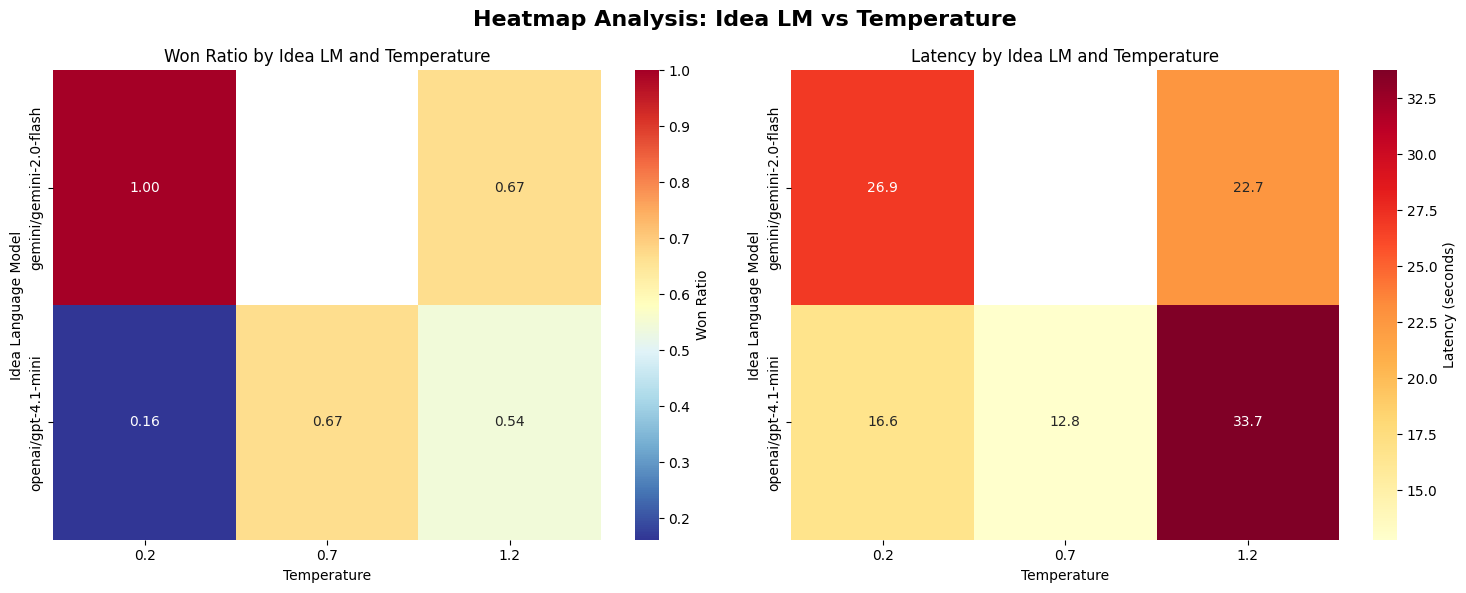

In [22]:
# Heatmap visualization for combined analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Heatmap Analysis: Idea LM vs Temperature', fontsize=16, fontweight='bold')

# Heatmap 1: Won Ratio
sns.heatmap(pivot_won_ratio, annot=True, cmap='RdYlBu_r', fmt='.2f', 
            cbar_kws={'label': 'Won Ratio'}, ax=axes[0])
axes[0].set_title('Won Ratio by Idea LM and Temperature')
axes[0].set_ylabel('Idea Language Model')
axes[0].set_xlabel('Temperature')

# Heatmap 2: Latency
sns.heatmap(pivot_latency, annot=True, cmap='YlOrRd', fmt='.1f', 
            cbar_kws={'label': 'Latency (seconds)'}, ax=axes[1])
axes[1].set_title('Latency by Idea LM and Temperature')
axes[1].set_ylabel('Idea Language Model')
axes[1].set_xlabel('Temperature')

plt.tight_layout()
plt.show()


SUMMARY ANALYSIS
Total experiments: 10
Overall win ratio: 0.524
Overall average latency: 22.51 seconds
Total picks: 50
Total wins: 25

Best performing configurations:
- Highest win ratio: {'idea_lm': 'gemini/gemini-2.0-flash', 'temperature': 0.2, 'num_reflection_steps': 3, 'won_ratio': 1.0}
- Lowest latency: {'idea_lm': 'gemini/gemini-2.0-flash', 'temperature': 1.2, 'num_reflection_steps': 1, 'latency': 9.819221019744871}

Correlation Matrix:
                      temperature  num_samples  num_reflection_steps  \
temperature                 1.000        0.162                 0.303   
num_samples                 0.162        1.000                 0.089   
num_reflection_steps        0.303        0.089                 1.000   
won_ratio                   0.346       -0.157                 0.452   
latency                     0.395        0.004                 0.891   

                      won_ratio  latency  
temperature               0.346    0.395  
num_samples              -0.157   

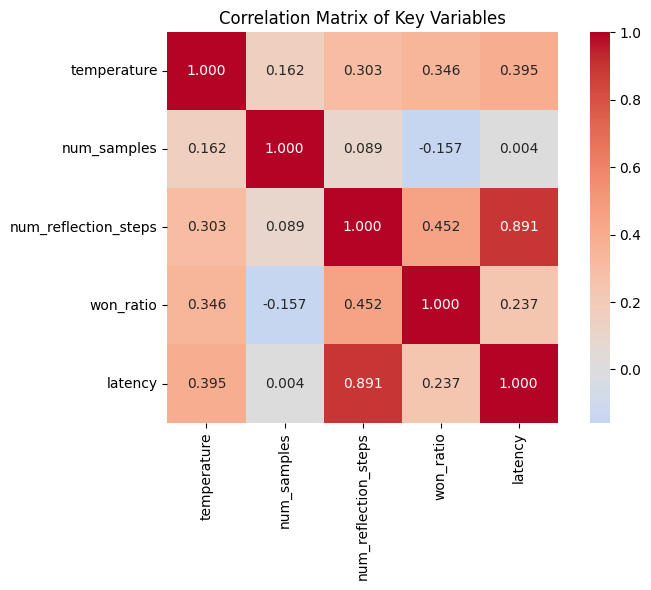

In [23]:
# Summary Statistics
print("="*60)
print("SUMMARY ANALYSIS")
print("="*60)

print(f"Total experiments: {len(df)}")
print(f"Overall win ratio: {df['won_ratio'].mean():.3f}")
print(f"Overall average latency: {df['latency'].mean():.2f} seconds")
print(f"Total picks: {df['picked'].sum()}")
print(f"Total wins: {df['won'].sum()}")

print("\nBest performing configurations:")
print("- Highest win ratio:", df.loc[df['won_ratio'].idxmax()][['idea_lm', 'temperature', 'num_reflection_steps', 'won_ratio']].to_dict())
print("- Lowest latency:", df.loc[df['latency'].idxmin()][['idea_lm', 'temperature', 'num_reflection_steps', 'latency']].to_dict())

# Correlation analysis
print("\nCorrelation Matrix:")
correlation_cols = ['temperature', 'num_samples', 'num_reflection_steps', 'won_ratio', 'latency']
correlation_matrix = df[correlation_cols].corr()
print(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()
